#### - Sobhan Moradian Daghigh
#### - 12/3/2021
#### - PR - EX01 - Q6 - Part b.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import lmfit

#### Reading data

In [2]:
dataset = pd.read_csv('./SPR_HW1/inputs/Q6/first_half_logs.csv', 
                      names=['timestamp', 'tag_id','x_pos', 'y_pos', 
                             'heading', 'direction', 'energy', 'speed', 'total_distance'])
dataset.head()

,timestamp,tag_id,x_pos,y_pos,heading,direction,energy,speed,total_distance
0,2013-11-03 18:01:09.002174,9,32.2538,12.7243,0.234750,0.00000,254.040,0.000000,329.554
1,2013-11-03 18:01:09.006261,13,21.1081,17.6180,1.413400,1.74127,202.250,0.907549,241.842
2,2013-11-03 18:01:09.007529,14,28.5255,17.5359,1.640910,-3.03810,190.648,0.572368,241.965
3,2013-11-03 18:01:09.027034,10,45.2474,14.4618,1.129020,0.00000,342.244,0.000000,349.529
4,2013-11-03 18:01:09.028946,8,28.5504,39.5494,0.927515,2.52704,304.319,1.060790,250.349


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625703 entries, 0 to 625702
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   timestamp       625703 non-null  object 
 1   tag_id          625703 non-null  int64  
 2   x_pos           625703 non-null  float64
 3   y_pos           625703 non-null  float64
 4   heading         625703 non-null  float64
 5   direction       625703 non-null  float64
 6   energy          625703 non-null  float64
 7   speed           625703 non-null  float64
 8   total_distance  625703 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 43.0+ MB


In [4]:
players = dataset.groupby(by=dataset.tag_id)
players.first()

,timestamp,x_pos,y_pos,heading,direction,energy,speed,total_distance
tag_id,,,,,,,,
1,2013-11-03 18:01:09.037716,53.1384,44.0620,2.127050,0.000000,143.88800,0.000000,236.971000
2,2013-11-03 18:01:09.03398,26.6202,29.4766,0.809050,0.881905,150.66900,0.935549,255.647000
3,2013-11-03 18:26:37.837428,38.7655,26.9372,-0.754098,-0.631358,0.00000,1.462690,0.670185
5,2013-11-03 18:01:09.030682,35.5428,30.3117,1.040150,-0.170872,364.37400,0.644301,297.906000
6,2013-11-03 18:01:14.457733,45.3925,67.2786,-1.738770,0.000000,34.12870,0.000000,30.365700
7,2013-11-03 18:01:09.049063,41.5713,38.6624,2.303420,-2.262020,264.25400,0.377474,311.243000
8,2013-11-03 18:01:09.028946,28.5504,39.5494,0.927515,2.527040,304.31900,1.060790,250.349000
9,2013-11-03 18:01:09.002174,32.2538,12.7243,0.234750,0.000000,254.04000,0.000000,329.554000
10,2013-11-03 18:01:09.027034,45.2474,14.4618,1.129020,0.000000,342.24400,0.000000,349.529000


In [5]:
for grp, pdf in players:
    print('player: {}  -  total_distance: {}'.format(grp, pdf.iloc[:, -1].max()))

player: 1  -  total_distance: 5921.5
player: 2  -  total_distance: 5849.06
player: 3  -  total_distance: 3.75693
player: 5  -  total_distance: 6658.27
player: 6  -  total_distance: 748.03
player: 7  -  total_distance: 6622.92
player: 8  -  total_distance: 6067.95
player: 9  -  total_distance: 6046.06
player: 10  -  total_distance: 7177.11
player: 11  -  total_distance: 634.211
player: 12  -  total_distance: 0.285215
player: 13  -  total_distance: 6317.69
player: 14  -  total_distance: 6692.62
player: 15  -  total_distance: 6448.72


#### It seems that theres some non-player captures which Im wanna filter them. 
#### Also I decided to ignore one of the substitute player to have 11 players at all.


In [6]:
dataset = dataset.drop(dataset[dataset.tag_id == 6].index)
dataset = dataset.drop(dataset[dataset.tag_id == 12].index)
dataset = dataset.drop(dataset[dataset.tag_id == 11].index)

players = dataset.groupby(by=dataset.tag_id)
players.first()

,timestamp,x_pos,y_pos,heading,direction,energy,speed,total_distance
tag_id,,,,,,,,
1,2013-11-03 18:01:09.037716,53.1384,44.0620,2.127050,0.000000,143.888,0.000000,236.971000
2,2013-11-03 18:01:09.03398,26.6202,29.4766,0.809050,0.881905,150.669,0.935549,255.647000
3,2013-11-03 18:26:37.837428,38.7655,26.9372,-0.754098,-0.631358,0.000,1.462690,0.670185
5,2013-11-03 18:01:09.030682,35.5428,30.3117,1.040150,-0.170872,364.374,0.644301,297.906000
7,2013-11-03 18:01:09.049063,41.5713,38.6624,2.303420,-2.262020,264.254,0.377474,311.243000
8,2013-11-03 18:01:09.028946,28.5504,39.5494,0.927515,2.527040,304.319,1.060790,250.349000
9,2013-11-03 18:01:09.002174,32.2538,12.7243,0.234750,0.000000,254.040,0.000000,329.554000
10,2013-11-03 18:01:09.027034,45.2474,14.4618,1.129020,0.000000,342.244,0.000000,349.529000
13,2013-11-03 18:01:09.006261,21.1081,17.6180,1.413400,1.741270,202.250,0.907549,241.842000


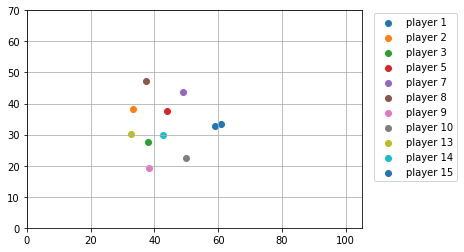

In [7]:
for grp, pdf in players:
    x_mean = pdf.loc[:, 'x_pos'].mean()
    y_mean = pdf.loc[:, 'y_pos'].mean()
    
    plt.scatter(x_mean, y_mean, label='player {}'.format(grp))
    
plt.legend(bbox_to_anchor=(1.3, 1.01))
plt.xlim([0, 105])
plt.ylim([0, 70])
plt.grid()
plt.show()

#### Past B.

Player 1:
	Mean [x_pos: 60.99, y_pos: 33.76]
	Covariance [xx: 173.51, xy: 170.85
		    xy: 170.85, yy: 168.23]
Player 2:
	Mean [x_pos: 31.52, y_pos: 37.03]
	Covariance [xx: 109.79, xy: 61.23
		    xy: 61.23, yy: 34.15]
Player 3:
	Mean [x_pos: 38.24, y_pos: 27.27]
	Covariance [xx: 0.06, xy: 0.1
		    xy: 0.1, yy: 0.15]
Player 5:
	Mean [x_pos: 45.7, y_pos: 38.25]
	Covariance [xx: 107.73, xy: 105.11
		    xy: 105.11, yy: 102.55]
Player 7:
	Mean [x_pos: 47.1, y_pos: 48.34]
	Covariance [xx: 198.12, xy: 144.13
		    xy: 144.13, yy: 104.85]
Player 8:
	Mean [x_pos: 36.92, y_pos: 47.83]
	Covariance [xx: 142.84, xy: 78.28
		    xy: 78.28, yy: 42.9]
Player 9:
	Mean [x_pos: 39.17, y_pos: 17.39]
	Covariance [xx: 52.24, xy: 43.47
		    xy: 43.47, yy: 36.17]
Player 10:
	Mean [x_pos: 49.95, y_pos: 18.46]
	Covariance [xx: 214.04, xy: 171.61
		    xy: 171.61, yy: 137.58]
Player 13:
	Mean [x_pos: 32.64, y_pos: 28.93]
	Covariance [xx: 92.69, xy: 51.01
		    xy: 51.01, yy: 28.07]
Player 14:
	Mean [x_pos: 4

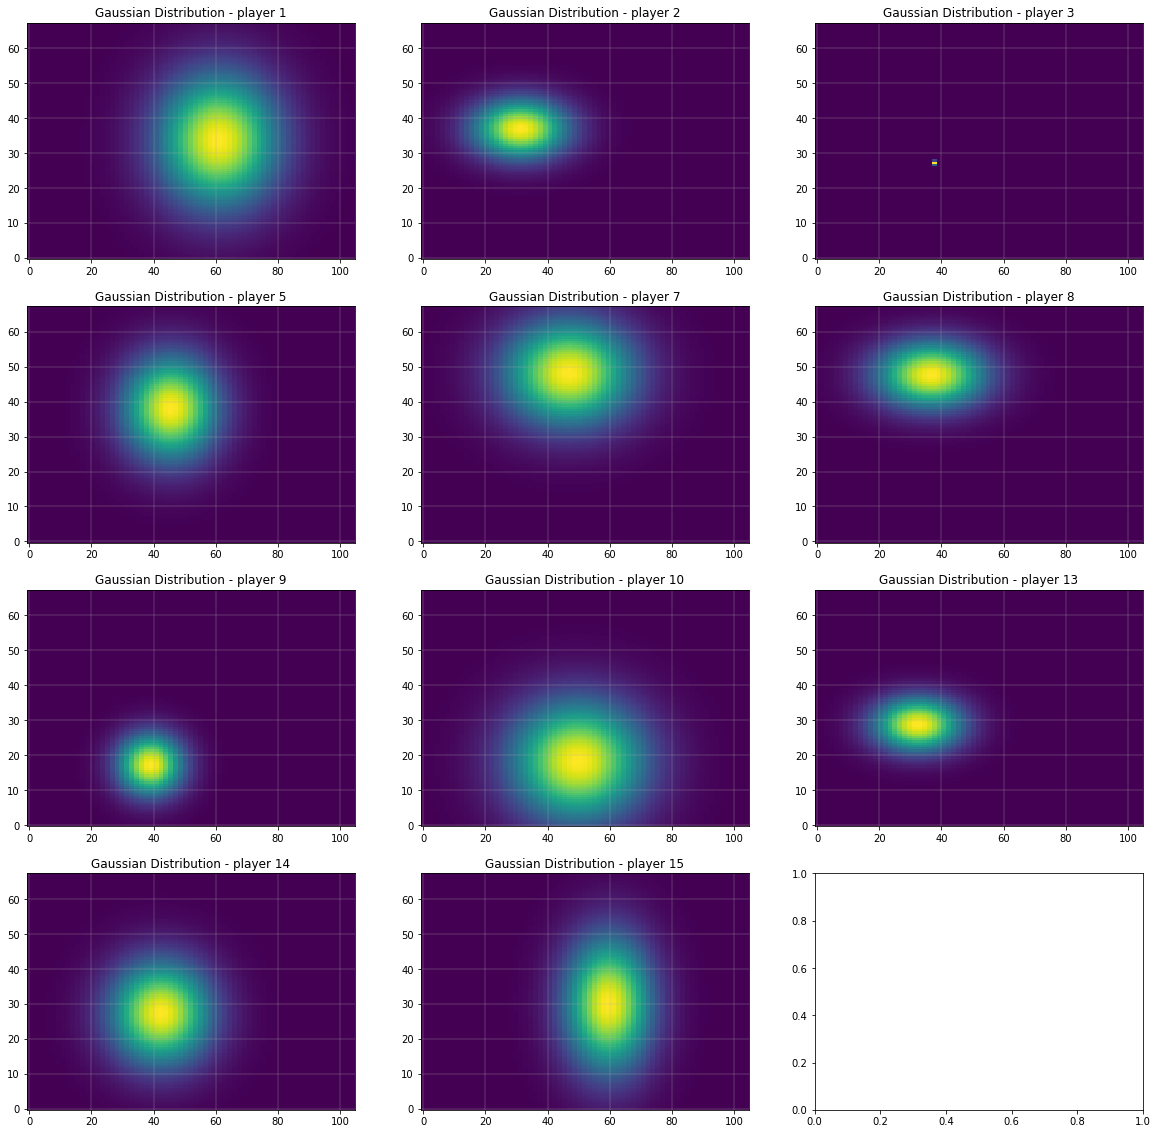

In [8]:
fig, ax = plt.subplots(4, 3, figsize=(20, 20))
index = 0

for grp, pdf in players:
    x = dataset[dataset.tag_id == grp].loc[:, 'x_pos']
    y = dataset[dataset.tag_id == grp].loc[:, 'y_pos']

    xedges = list(range(0, 105, 1))
    yedges = list(range(0, 68, 1))

    H, xedges, yedges = np.histogram2d(x, y, bins=(xedges, yedges))
    X, Y = np.meshgrid(np.linspace(0, H.shape[0], H.shape[1]), np.linspace(0, H.shape[1], H.shape[0]))
    
    # slice the H matrix to seperated parts
    x, y, z = np.array([]), np.array([]), np.array([])
    for i in range(0, H.shape[0]):
        for j in range(0, H.shape[1]):
            x = np.append(x, i)
            y = np.append(y, j)
            z = np.append(z, H[i][j])
        
    error = np.sqrt(z+1)
    # Interpolate, using cubic method
    Z = griddata((x, y), z, (X, Y), method='cubic')
    # Model fitting
    gaussian_model = lmfit.models.Gaussian2dModel()
    params = gaussian_model.guess(z, x, y)
    result = gaussian_model.fit(z, x=x, y=y, params=params, weights=1/error)

    fit = gaussian_model.func(X, Y, **result.best_values)
    ax[int(np.divide(index, 3)), np.mod(index, 3)].pcolor(X, Y, fit)
    ax[int(np.divide(index, 3)), np.mod(index, 3)].set_title('Gaussian Distribution - player {}'.format(grp))
    ax[int(np.divide(index, 3)), np.mod(index, 3)].grid(linewidth=0.3)
    index += 1
    
    meanx = round(result.params['centerx'].value, 2)
    meany = round(result.params['centery'].value, 2)
    varx = result.params["sigmax"].value
    vary = result.params["sigmay"].value
    varxx = round(np.multiply(varx, varx), 2)
    varxy = round(np.multiply(varx, vary), 2)
    varyy = round(np.multiply(vary, vary), 2)
    
    print('Player {}:\n\tMean [x_pos: {}, y_pos: {}]\n\tCovariance [xx: {}, xy: {}\n\t\t    xy: {}, yy: {}]'
          .format(grp, meanx, meany, varxx, varxy, varxy, varyy))